##**White wine analysis**

The project concerns the prediction of white wine quality using Machine Learning approaches. In this study I have performed EDA analysis and I have used a different ML algorithms such as Logistic Regression, KNN, Naive Bayes, SVM, Decision Tree and Random Forest to make a predictions.

In the first part I am going to do some exploratory analysis to understand the nature of data about white wine and the underlying distribution, mostly I will focus on outliers and I will show how to cope with them. In the second I have used some Machine Learning algorithms to resolve problem assumed.

The dataset can be found at Kaggle and contains data about white wine quality. It consists of the following variables:

- **citric acid** - found in small quantities, citric acid can add 'freshness' and flavor to wines;
- **free sulfur dioxide** - it prevents microbial growth and the oxidation of wine;
- **pH** - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale;
- **fixed acidity** - most acids involved with wine or fixed or nonvolatile;
- **residual sugar** - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet;
- **total sulfur dioxide** - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine;
- **sulphates** - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant;
- **volatile acidity** - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste;
- **chlorides** - the amount of salt in the wine;
- **density** - the density of water is close to that of water depending on the percent alcohol and sugar content;
- **alcohol** - the percent alcohol content of the wine;
- **quality** - score between 0 and 10.


### **Import libraries and data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#xgboost model
from xgboost import XGBClassifier

In [ ]:
cd "/content/drive/My Drive/Colab Notebooks/wine_analysis"

/content/drive/My Drive/Colab Notebooks/wine_analysis


In [ ]:
ls

winequality-red.csv  winequality-white.csv


First observations:

In [ ]:
wine_white = pd.read_csv('winequality-white.csv', sep=';')
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine_white.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [ ]:
wine_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
#shape of data
wine_white.shape

(4898, 12)

In [ ]:
#check any missing values:
wine_white.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [ ]:
#statistics
wine_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


##**Data analysis**

**Histogram Charts for numerical variables**

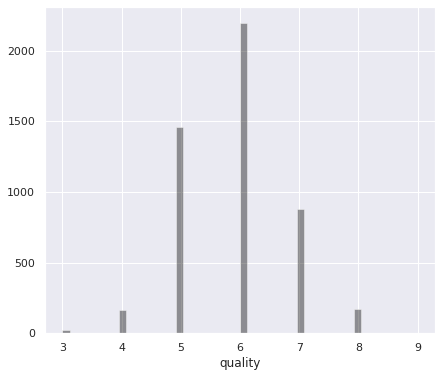

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(wine_white['quality'], kde= False,color= 'black')
plt.show()

**The Histogram Chart** confirms that the distribution of **quality** is almost normally skewed without a peak.

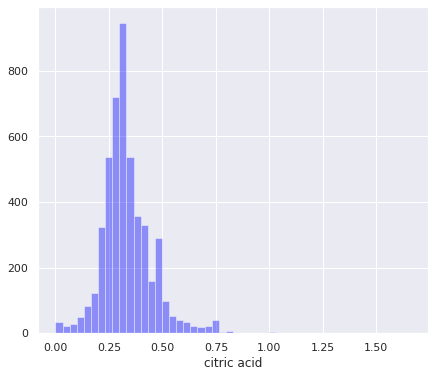

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(wine_white['citric acid'], kde= False,color= 'blue')
plt.show()

**The Histogram Chart** confirms that the distribution of **citric acid** is slightly skewed right with a peak.

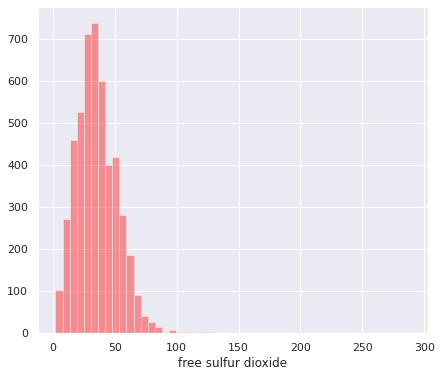

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(wine_white['free sulfur dioxide'], kde= False,color= 'red')
plt.show()

**The Histogram Chart** confirms that the distribution of **free sulfur dioxide** is slightly skewed right without a peak.

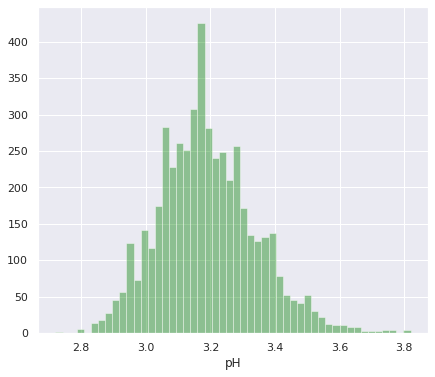

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(wine_white['pH'], kde= False,color= 'green')
plt.show()

**The Histogram Chart** confirms that the distribution of **pH** is almost normally skewed with a peak.

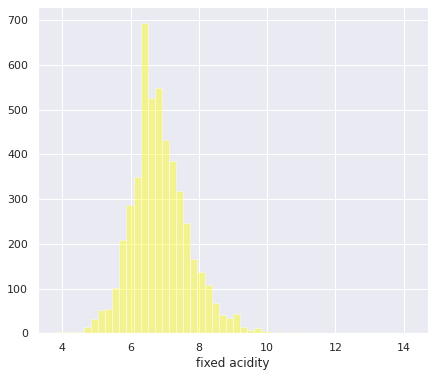

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(wine_white['fixed acidity'], kde= False,color= 'yellow')
plt.show()

**The Histogram Chart** confirms that the distribution of **fixed acidity** is slightly skewed right with a peak.

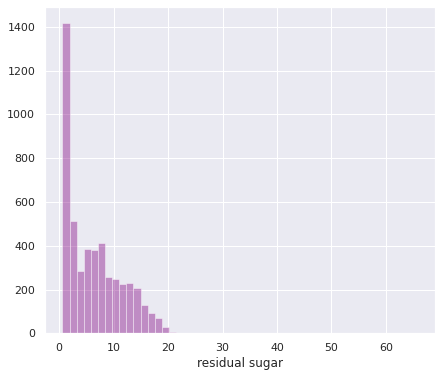

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(wine_white['residual sugar'], kde= False,color= 'purple')
plt.show()

**The Histogram Chart** confirms that the distribution of **residual sugar** is slightly skewed left with a peak.

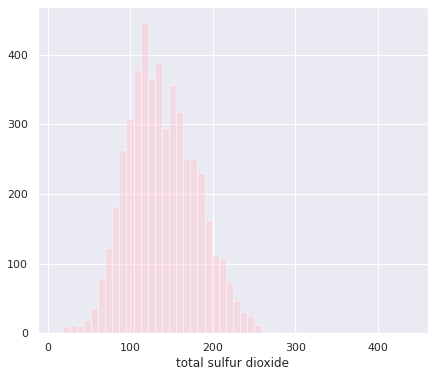

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(wine_white['total sulfur dioxide'], kde= False,color= 'pink')
plt.show()

**The Histogram Chart** confirms that the distribution of **total sulfur dioxide** is slightly skewed right with a peak.

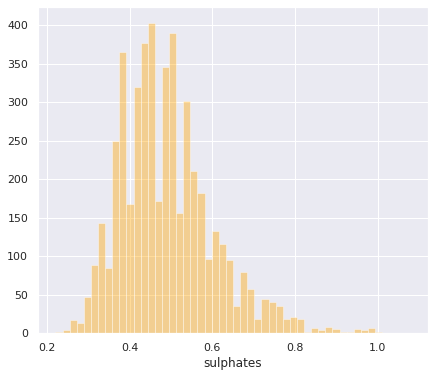

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(wine_white['sulphates'], kde= False,color= 'orange')
plt.show()

**The Histogram Chart** confirms that the distribution of **sulphates** is slightly skewed left without a peak.

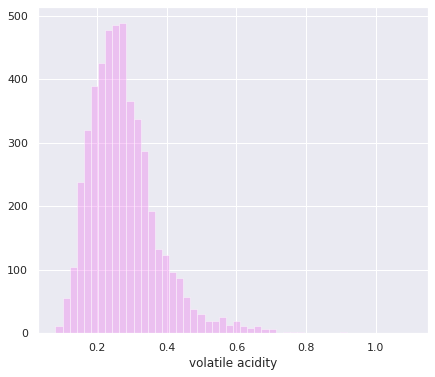

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(wine_white['volatile acidity'], kde= False,color= 'violet')
plt.show()

**The Histogram Chart** confirms that the distribution of **volatile acidity** is slightly skewed left without a peak.

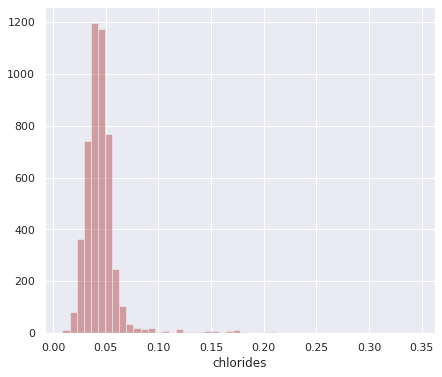

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(wine_white['chlorides'], kde= False,color= 'brown')
plt.show()

**The Histogram Chart** confirms that the distribution of **chlorides** is slightly skewed right without a peak.

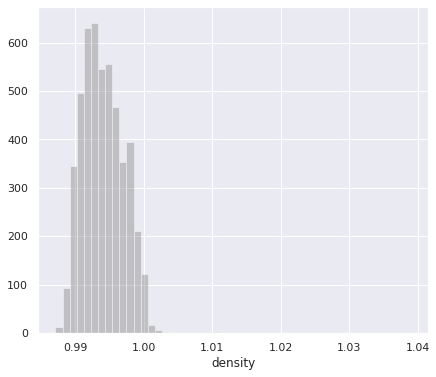

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(wine_white['density'], kde= False,color= 'gray')
plt.show()

**The Histogram Chart** confirms that the distribution of **density** is slightly skewed right without a peak.

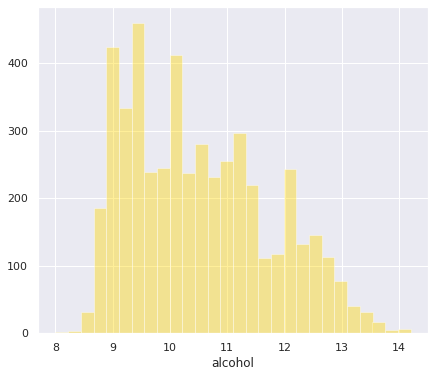

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(wine_white['alcohol'], kde= False,color= 'gold')
plt.show()

**The Histogram Chart** confirms that the distribution of **alcohol** is slightly skewed right without a peak.

##**Box and violin Charts to checking for outliers in numerical variables**

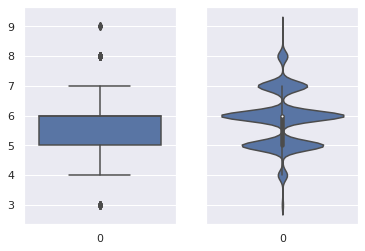

In [ ]:
#checking for outliers in the quality column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=wine_white['quality'], ax=axes[0]);
sns.violinplot(data=wine_white['quality'], ax=axes[1]);

From box and violin plots one can see that most white wine has quality between 5 and 6. But there are few unique white wines having greater quality (over 9) than the rest or smaller quality (almost 3) than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

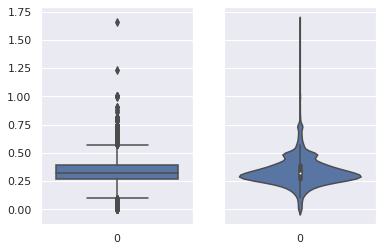

In [ ]:
#checking for outliers in the citric acid column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=wine_white['citric acid'], ax=axes[0]);
sns.violinplot(data=wine_white['citric acid'], ax=axes[1]);

From box and violin plots one can see that most white wines have critic acid between 0.25 and 0.40. But there are few unique white wines having greater amount of citric acid (almost 1.75) than the rest or smaller amount of critic acid (near 0.00) than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

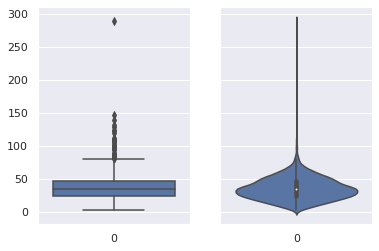

In [ ]:
#checking for outliers in the free sulfur dioxide column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=wine_white['free sulfur dioxide'], ax=axes[0]);
sns.violinplot(data=wine_white['free sulfur dioxide'], ax=axes[1]);

From box and violin plots one can see that most white wines have free sulfur dioxide between 25 and 50. But there are few unique white wines having greater amount of free sulfur dioxide than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

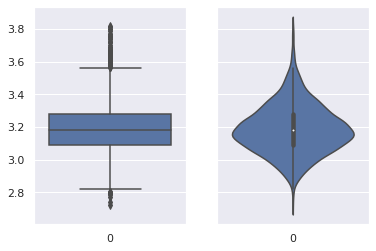

In [ ]:
#checking for outliers in the pH column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=wine_white['pH'], ax=axes[0]);
sns.violinplot(data=wine_white['pH'], ax=axes[1]);

From box and violin plots one can see that most white wines have pH between 3.1 and 3.3. But there are few unique white wines having greater pH than the rest or smaller pH than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

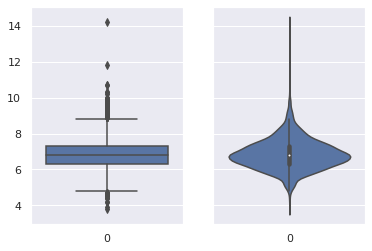

In [ ]:
#checking for outliers in the fixed acidity  column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=wine_white['fixed acidity'], ax=axes[0]);
sns.violinplot(data=wine_white['fixed acidity'], ax=axes[1]);

From box and violin plots one can see that most white wines have fixed acidity between 6.1 and 7.7. But there are few unique white wines having greater amount of fixed acidity than the rest or smaller amount of fixed acidity than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

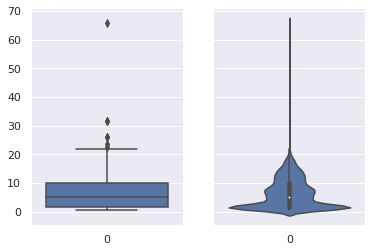

In [ ]:
#checking for outliers in the residual sugar column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=wine_white['residual sugar'], ax=axes[0]);
sns.violinplot(data=wine_white['residual sugar'], ax=axes[1]);

From box and violin plots one can see that most white wines have residual sugar between 1 and 10. But there are few unique white wines having greater amount of residual sugar than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

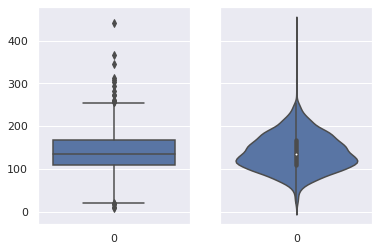

In [ ]:
#checking for outliers in the total sulfur dioxide column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=wine_white['total sulfur dioxide'], ax=axes[0]);
sns.violinplot(data=wine_white['total sulfur dioxide'], ax=axes[1]);

From box and violin plots one can see that most white wines have total sulfur dioxide between 110 and 180. But there are few unique white wines having greater amount of total sulfur dioxide than the rest or smaller amount of total sulfur dioxide than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

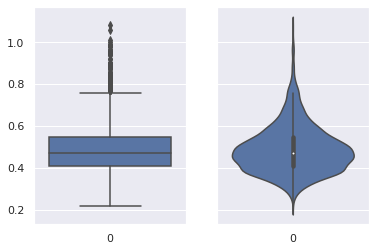

In [ ]:
#checking for outliers in the sulphates column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=wine_white['sulphates'], ax=axes[0]);
sns.violinplot(data=wine_white['sulphates'], ax=axes[1]);

From box and violin plots one can see that most white wines have sulphates between 0.41 and 0.57. But there are few unique white wines having greater amount of sulphates than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

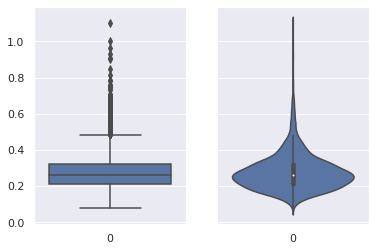

In [ ]:
#checking for outliers in the volatile acidity column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=wine_white['volatile acidity'], ax=axes[0]);
sns.violinplot(data=wine_white['volatile acidity'], ax=axes[1]);

From box and violin plots one can see that most white wines have volatile acidity between 0.21 and 0.37. But there are few unique white wines having greater amount of volatile acidity than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

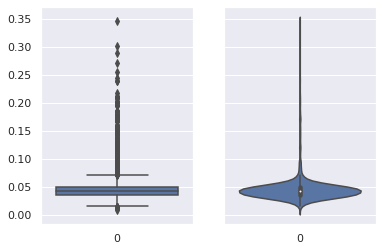

In [ ]:
#checking for outliers in the chlorides column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=wine_white['chlorides'], ax=axes[0]);
sns.violinplot(data=wine_white['chlorides'], ax=axes[1]);

From box and violin plots one can see that most white wines have chlorides between 0.04 and 0.05. But there are few unique white wines having greater amount of chlorides than the rest or smaller amount of chlorides than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

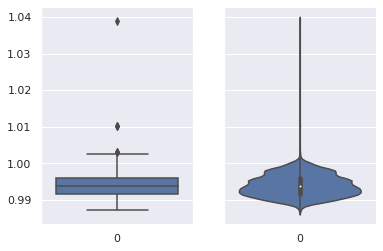

In [ ]:
#checking for outliers in the density column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=wine_white['density'], ax=axes[0]);
sns.violinplot(data=wine_white['density'], ax=axes[1]);

From box and violin plots one can see that most white wines have density between 0.992 and 0.997. But there are few unique white wines having greater density than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

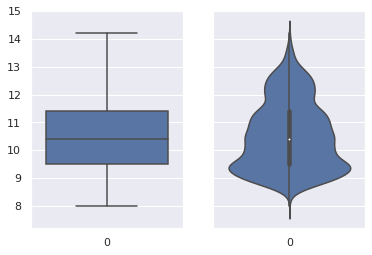

In [ ]:
#checking for outliers in the alcohol column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=wine_white['alcohol'], ax=axes[0]);
sns.violinplot(data=wine_white['alcohol'], ax=axes[1]);

From box and violin plots one can see that most white wines have alcohol between 9.5 and 11.5. But there are few unique white wines having greater amount of alcohol than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

Since 'quality' is my target variable in the next part I will plot a boxplot each column against 'quality' variable.

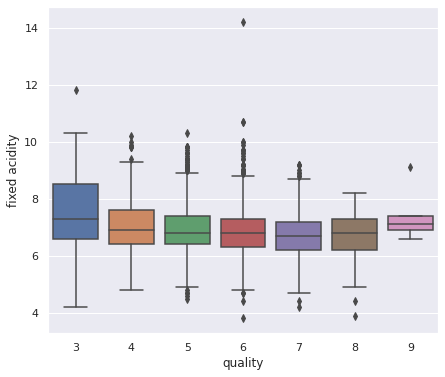

In [ ]:
sns.boxplot('quality', 'fixed acidity', data = wine_white);

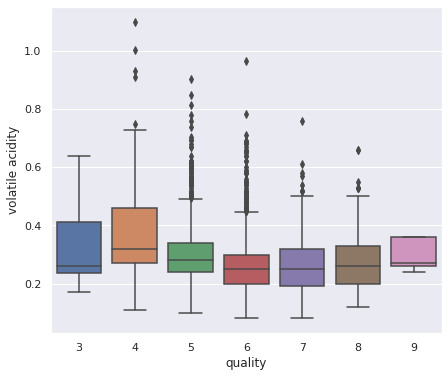

In [ ]:
sns.boxplot('quality', 'volatile acidity', data = wine_white);

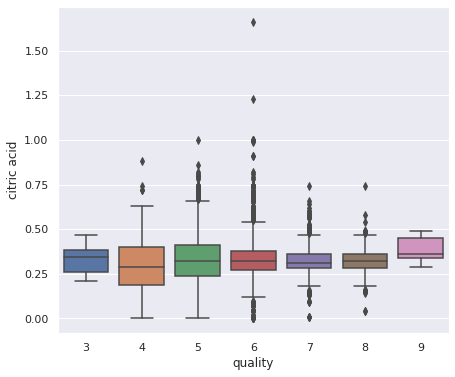

In [ ]:
sns.boxplot('quality', 'citric acid', data = wine_white);

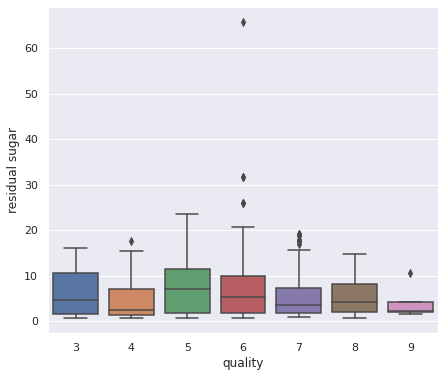

In [ ]:
sns.boxplot('quality', 'residual sugar', data = wine_white);

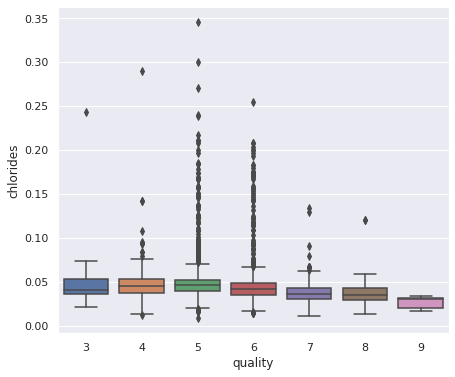

In [ ]:
sns.boxplot('quality', 'chlorides', data = wine_white);

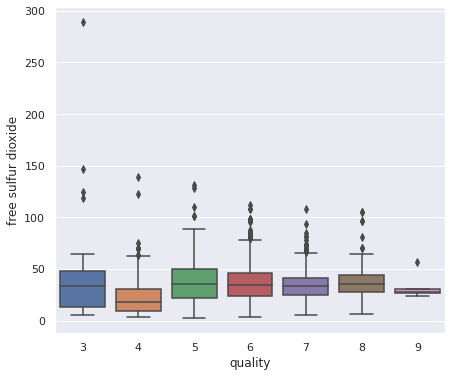

In [ ]:
sns.boxplot('quality', 'free sulfur dioxide', data = wine_white);

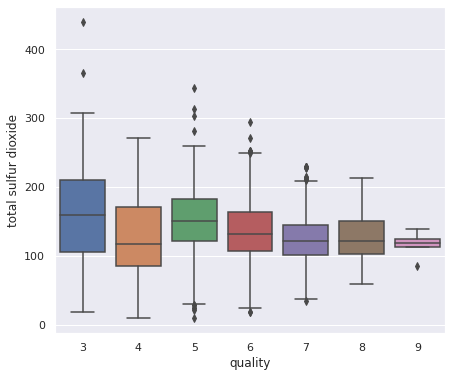

In [ ]:
sns.boxplot('quality', 'total sulfur dioxide', data = wine_white);

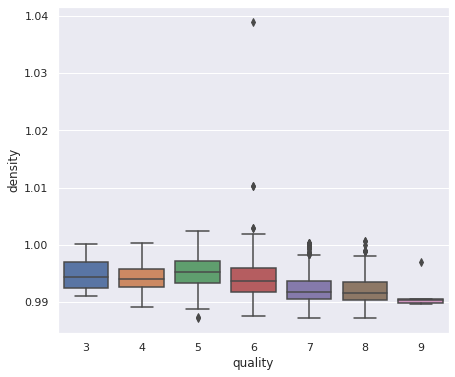

In [ ]:
sns.boxplot('quality', 'density', data = wine_white);

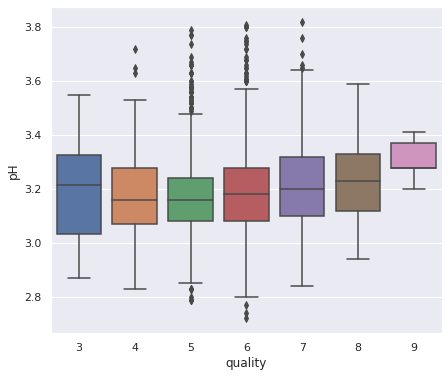

In [ ]:
sns.boxplot('quality', 'pH', data = wine_white);

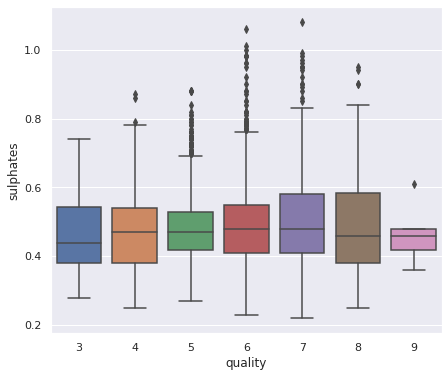

In [ ]:
sns.boxplot('quality', 'sulphates', data = wine_white);

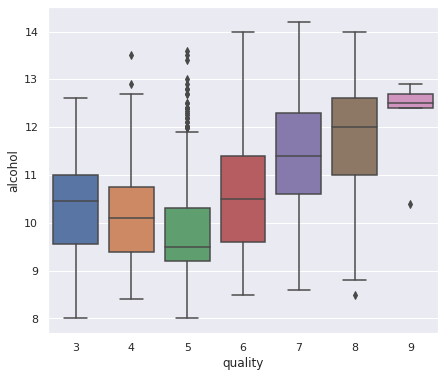

In [ ]:
sns.boxplot('quality', 'alcohol', data = wine_white);

One can see that boxplots show many outliers for quite a few columns. By virtue 'Describe' function that I have used previously I got a better idea on what's happening:
- fixed acidity - 25% - 7.1 and 50% - 7.9. Not much of a variance. Could explain the huge number of outliers;
- volatile acididty - similar reasoning;
- citric acid - seems to be somewhat uniformly distributed;
- residual sugar - min - 0.9, max - 15!! It is too much difference. Could explain the outliers;
- chlorides - same as residual sugar. Min - 0.012, max - 0.611;
- free sulfur dioxide, total suflur dioxide - the same explanation as above.

To remove outliers which may infuence on data analysis I will use Tukey's Method for identfying them. This way an outlier is calculated as 1.5 times the interquartile range (IQR).

In [ ]:
# For each feature we find the data points with extreme high or low values
for feature in wine_white.keys():

    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(wine_white[feature], q=25)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(wine_white[feature], q=75)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    IQR = Q3 - Q1
    step = 1.5 * IQR

    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(wine_white[~((wine_white[feature] >= Q1 - step) & (wine_white[feature] <= Q3 + step))])

# Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_wine_white = wine_white.drop(wine_white.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'fixed acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
98,9.8,0.360,0.46,10.50,0.038,4.0,83.0,0.99560,2.89,0.30,10.1,4
169,9.8,0.420,0.48,9.85,0.034,5.0,110.0,0.99580,2.87,0.29,10.0,5
207,10.2,0.440,0.88,6.20,0.049,20.0,124.0,0.99680,2.99,0.51,9.9,4
294,9.1,0.590,0.38,1.60,0.066,34.0,182.0,0.99680,3.23,0.38,8.5,3
358,10.0,0.200,0.39,1.40,0.050,19.0,152.0,0.99400,3.00,0.42,10.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4679,4.7,0.335,0.14,1.30,0.036,69.0,168.0,0.99212,3.47,0.46,10.5,5
4786,4.4,0.320,0.39,4.30,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8
4787,3.9,0.225,0.40,4.20,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8
4792,4.7,0.785,0.00,3.40,0.036,23.0,134.0,0.98981,3.53,0.92,13.8,6


Data points considered outliers for the feature 'volatile acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
23,7.6,0.670,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5
79,6.7,0.540,0.28,5.4,0.060,21.0,105.0,0.99490,3.27,0.37,9.0,5
147,6.4,0.595,0.14,5.2,0.058,15.0,97.0,0.99510,3.38,0.36,9.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4847,4.4,0.540,0.09,5.1,0.038,52.0,97.0,0.99022,3.41,0.40,12.2,7
4860,6.0,0.520,0.33,7.7,0.046,24.0,119.0,0.99224,3.04,0.38,11.0,6
4867,5.3,0.600,0.34,1.4,0.031,3.0,60.0,0.98854,3.27,0.38,13.0,6
4877,5.9,0.540,0.00,0.8,0.032,12.0,82.0,0.99286,3.25,0.36,8.8,5


Data points considered outliers for the feature 'citric acid':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.7,5
16,6.3,0.48,0.04,1.10,0.046,30.0,99.0,0.99280,3.24,0.36,9.6,6
54,6.8,0.20,0.59,0.90,0.147,38.0,132.0,0.99300,3.05,0.38,9.1,6
62,7.0,0.47,0.07,1.10,0.035,17.0,151.0,0.99100,3.02,0.34,10.5,5
65,6.2,0.35,0.03,1.20,0.064,29.0,120.0,0.99340,3.22,0.54,9.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4808,7.3,0.35,0.67,8.30,0.053,10.0,100.0,0.99590,3.19,0.50,10.9,5
4815,6.2,0.76,0.01,3.20,0.041,18.0,120.0,0.99026,3.20,0.94,13.7,7
4847,4.4,0.54,0.09,5.10,0.038,52.0,97.0,0.99022,3.41,0.40,12.2,7
4877,5.9,0.54,0.00,0.80,0.032,12.0,82.0,0.99286,3.25,0.36,8.8,5


Data points considered outliers for the feature 'residual sugar':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1608,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
4480,5.9,0.220,0.45,22.60,0.120,55.0,122.0,0.99636,3.10,0.35,12.8,5


Data points considered outliers for the feature 'chlorides':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
23,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.30,5
35,7.3,0.28,0.43,1.7,0.080,21.0,123.0,0.99050,3.19,0.42,12.80,5
40,6.7,0.23,0.39,2.5,0.172,63.0,158.0,0.99370,3.11,0.36,9.40,6
41,6.7,0.24,0.39,2.9,0.173,63.0,157.0,0.99370,3.10,0.34,9.40,6
54,6.8,0.20,0.59,0.9,0.147,38.0,132.0,0.99300,3.05,0.38,9.10,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4813,5.8,0.36,0.50,1.0,0.127,63.0,178.0,0.99212,3.10,0.45,9.70,5
4820,5.8,0.36,0.50,1.0,0.127,63.0,178.0,0.99212,3.10,0.45,9.70,5
4836,6.7,0.50,0.36,11.5,0.096,18.0,92.0,0.99642,3.11,0.49,9.60,5
4845,6.6,0.38,0.29,2.4,0.136,15.0,93.0,0.99336,3.18,0.60,9.50,5


Data points considered outliers for the feature 'free sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
67,6.7,0.250,0.13,1.20,0.041,81.0,174.0,0.99200,3.14,0.42,9.8,5
297,7.2,0.190,0.46,3.80,0.041,82.0,187.0,0.99320,3.19,0.60,11.2,7
325,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
387,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.99410,3.12,0.66,10.1,5
395,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5
405,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5
459,6.1,0.430,0.35,9.10,0.059,83.0,249.0,0.99710,3.37,0.50,8.5,5
659,6.8,0.290,0.16,1.40,0.038,122.5,234.5,0.99220,3.15,0.47,10.0,4
752,6.7,0.200,0.42,14.00,0.038,83.0,160.0,0.99870,3.16,0.50,9.4,6
766,6.7,0.500,0.63,13.40,0.078,81.0,238.0,0.99880,3.08,0.44,9.2,5


Data points considered outliers for the feature 'total sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
227,7.1,0.250,0.32,10.30,0.041,66.0,272.0,0.99690,3.17,0.52,9.1,6
325,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
387,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.99410,3.12,0.66,10.1,5
740,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3
1417,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3
1931,7.1,0.490,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3
1940,8.3,0.360,0.57,15.00,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5
1942,8.3,0.360,0.57,15.00,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5
2127,9.1,0.330,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5
2378,9.4,0.230,0.56,16.45,0.063,52.5,282.0,1.00098,3.10,0.51,9.3,5


Data points considered outliers for the feature 'density':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6


Data points considered outliers for the feature 'pH':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
72,6.0,0.270,0.28,4.8,0.063,31.0,201.0,0.99640,3.69,0.71,10.0,5
115,5.5,0.485,0.00,1.5,0.065,8.0,103.0,0.99400,3.63,0.40,9.7,4
250,5.9,0.210,0.28,4.6,0.053,40.0,199.0,0.99640,3.72,0.70,10.0,4
320,6.0,0.100,0.24,1.1,0.041,15.0,65.0,0.99270,3.61,0.61,10.3,7
507,6.0,0.240,0.27,1.9,0.048,40.0,170.0,0.99380,3.64,0.54,10.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4565,5.8,0.280,0.66,9.1,0.039,26.0,159.0,0.99650,3.66,0.55,10.8,5
4567,5.8,0.280,0.66,9.1,0.039,26.0,159.0,0.99650,3.66,0.55,10.8,5
4601,6.9,0.230,0.35,6.9,0.030,45.0,116.0,0.99244,2.80,0.54,11.0,6
4744,5.0,0.240,0.19,5.0,0.043,17.0,101.0,0.99438,3.67,0.57,10.0,5


Data points considered outliers for the feature 'sulphates':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
80,6.8,0.220,0.31,1.4,0.053,34.0,114.0,0.99290,3.39,0.77,10.600000,6
154,8.2,0.230,0.40,7.5,0.049,12.0,76.0,0.99660,3.06,0.84,9.700000,6
209,6.1,0.400,0.31,0.9,0.048,23.0,170.0,0.99300,3.22,0.77,9.500000,6
245,6.1,0.180,0.36,2.0,0.038,20.0,249.5,0.99230,3.37,0.79,11.300000,6
339,6.6,0.180,0.35,1.5,0.049,49.0,141.0,0.99340,3.43,0.85,10.200000,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4792,4.7,0.785,0.00,3.4,0.036,23.0,134.0,0.98981,3.53,0.92,13.800000,6
4815,6.2,0.760,0.01,3.2,0.041,18.0,120.0,0.99026,3.20,0.94,13.700000,7
4818,6.0,0.270,0.40,1.7,0.021,18.0,82.0,0.98910,3.24,0.95,13.133333,6
4886,6.2,0.210,0.28,5.7,0.028,45.0,121.0,0.99168,3.21,1.08,12.150000,7


Data points considered outliers for the feature 'alcohol':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Data points considered outliers for the feature 'quality':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
22,6.8,0.260,0.42,1.7,0.049,41.0,122.0,0.99300,3.47,0.48,10.5,8
68,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
74,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4765,5.2,0.300,0.34,1.5,0.038,18.0,96.0,0.98942,3.56,0.48,13.0,8
4766,6.4,0.320,0.25,5.0,0.055,28.0,138.0,0.99171,3.27,0.50,12.4,8
4786,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8
4787,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8


Now I can plot a heatmap of co-relations between features (after outliers extraction), which will help me to get more insights.

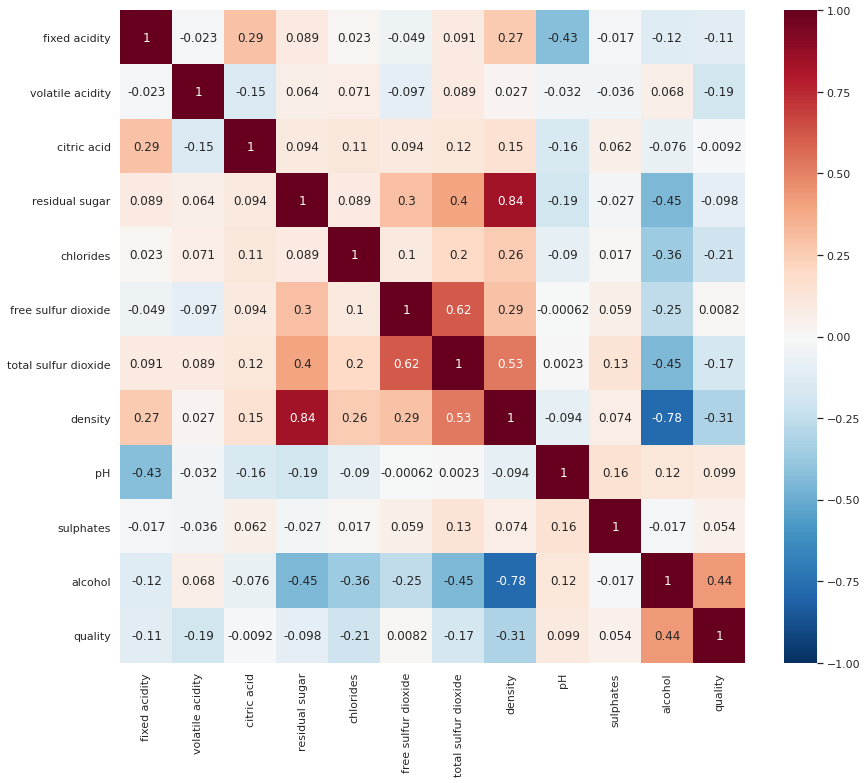

In [ ]:
correlation = good_wine_white.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

Next I explore these co-relationships in more detail. Firstly I visualize relationships of **discrete values** better with **a bar plots**.

##**Bar plots of discrete features**

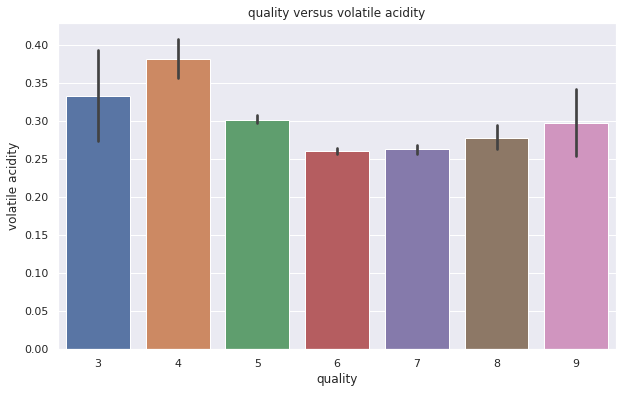

In [ ]:
volatileAcidity_quality = good_wine_white[['quality', 'volatile acidity']]
fig, axs = plt.subplots(ncols=1,figsize=(10,6));
sns.barplot(x='quality', y='volatile acidity', data=volatileAcidity_quality, ax=axs);
plt.title('quality versus volatile acidity');

A higher quality is usually associated with low volatile acidity levels. This makes sense, because volatile acidity is an indicator of spoilage and could give rise to unpleasant aromas — consistent with my domain knowledge.

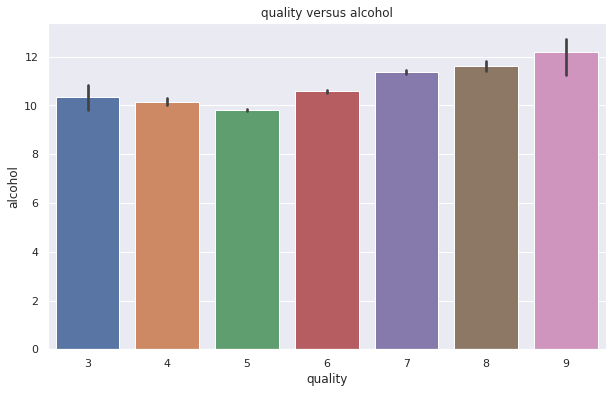

In [ ]:
Alcohol_quality = good_wine_white[['quality', 'alcohol']]
fig, axs = plt.subplots(ncols=1,figsize=(10,6));
sns.barplot(x='quality', y='alcohol', data=Alcohol_quality, ax=axs);
plt.title('quality versus alcohol');

A higher quality is usually associated with high alcohol levels. This makes sense, because most people generally like wines that contain a higher percentage of alcohol.

Secondly I visualize relationships of **continuous values** better with a **scatter plots**.

## **Scater plots of continuous features**

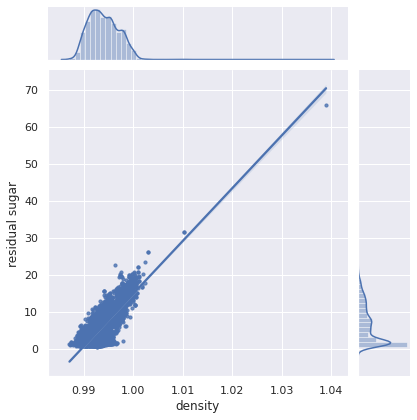

In [ ]:
#Create a new dataframe containing only density and residual sugar columns to visualize their co-relations
Density_residualSugar = good_wine_white[['density', 'residual sugar']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridD = sns.JointGrid(x="density", y="residual sugar", data=Density_residualSugar, height=6)

#Draws a regression plot in the grid
gridD = gridD.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridD = gridD.plot_marginals(sns.distplot)

**This scatter-plot** shows how the values of **residual sugar** change with changing **density** levels. One can see that, as density levels increase, the residual sugar levels also increase. It is true, since sweeter wines generally have higher densities.

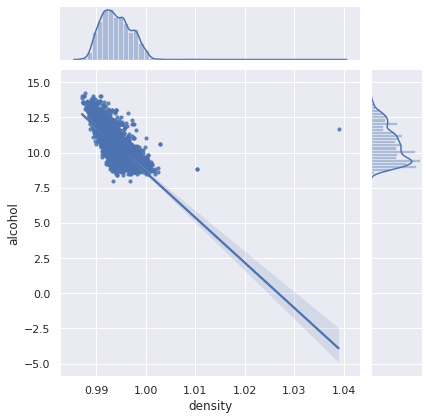

In [ ]:
#Create a new dataframe containing only density and alcohol columns to visualize their co-relations
Density_alcohol = good_wine_white[['density', 'alcohol']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridD = sns.JointGrid(x="density", y="alcohol", data=Density_alcohol, height=6)

#Draws a regression plot in the grid
gridD = gridD.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridD = gridD.plot_marginals(sns.distplot)

**This scatter-plot** shows how the values of **alcohol** change with changing **density** levels. One can see that, as density levels increase, the alcohol levels drop, what is true.

##**Preparation of a dataset to use a ML models**

In [ ]:
def quality(row):
  if row < 5:
    return '0'
  elif row > 6:
    return '2'
  else:
    return '1'

In [ ]:
good_wine_white['quality'] = good_wine_white['quality'].apply(quality)
good_wine_white.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,1


##**Build the ML model**

At the begining I split data into features and target label:

In [ ]:
X=good_wine_white.drop('quality', axis=1)
y=good_wine_white['quality']

I standarize our X variable:

In [ ]:
X=StandardScaler().fit_transform(X)

Next I split data into training and testing sets and show the result of the splitting:

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (3918, 11) (3918,)
Test set: (980, 11) (980,)


**Logistic regression model**


In [ ]:
lreg_model = LogisticRegression()

lreg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lreg_model.predict(X_test)
lreg_score = accuracy_score(y_test, y_pred)
lreg_score

0.7561224489795918

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.03      0.06        30
           1       0.78      0.93      0.85       723
           2       0.58      0.29      0.38       227

    accuracy                           0.76       980
   macro avg       0.56      0.42      0.43       980
weighted avg       0.72      0.76      0.72       980



**SVM model**

In [ ]:
svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [ ]:
svm_score = accuracy_score(y_test, y_pred)
svm_score

0.7377551020408163

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.74      1.00      0.85       723
           2       0.00      0.00      0.00       227

    accuracy                           0.74       980
   macro avg       0.25      0.33      0.28       980
weighted avg       0.54      0.74      0.63       980



**Gaussian Naive Bayes model**

In [ ]:
gaussianNB_model = GaussianNB()

gaussianNB_model.fit(X_train, y_train)
y_pred = gaussianNB_model.predict(X_test)

In [ ]:
acc_gaussianNB = accuracy_score(y_test, y_pred)
acc_gaussianNB

0.6632653061224489

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.30      0.25        30
           1       0.85      0.67      0.75       723
           2       0.42      0.70      0.53       227

    accuracy                           0.66       980
   macro avg       0.50      0.55      0.51       980
weighted avg       0.73      0.66      0.68       980



**KNN model**

In [ ]:
Knn = KNeighborsClassifier(n_neighbors = 3)

Knn.fit(X_train, y_train)
knn_pred = Knn.predict(X_test)

In [ ]:
acc_knn = accuracy_score(y_test, knn_pred)
acc_knn

0.7959183673469388

In [ ]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.30      0.30      0.30        30
           1       0.85      0.89      0.87       723
           2       0.67      0.58      0.62       227

    accuracy                           0.80       980
   macro avg       0.61      0.59      0.60       980
weighted avg       0.79      0.80      0.79       980



**Random Forest model**

In [ ]:
RF_model = RandomForestClassifier(n_estimators=100)

RF_model.fit(X_train, y_train)
RF_pred = RF_model.predict(X_test)

In [ ]:
acc_RF = accuracy_score(y_test, RF_pred)
acc_RF

0.8653061224489796

In [ ]:
print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

           0       0.57      0.13      0.22        30
           1       0.87      0.96      0.91       723
           2       0.84      0.67      0.75       227

    accuracy                           0.87       980
   macro avg       0.76      0.59      0.63       980
weighted avg       0.86      0.87      0.85       980



**XGBoost model**

In [ ]:
xgb_model = XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123)
xgb_model.fit(X_train, y_train)
pred_xg = xgb_model.predict(X_test)
acc_xg = accuracy_score(y_test, pred_xg)
acc_xg

0.7653061224489796

In [ ]:
print(classification_report(y_test, pred_xg))

              precision    recall  f1-score   support

           0       0.50      0.03      0.06        30
           1       0.78      0.96      0.86       723
           2       0.65      0.26      0.37       227

    accuracy                           0.77       980
   macro avg       0.64      0.41      0.43       980
weighted avg       0.74      0.77      0.72       980



**DecisionTree Model**

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, pred_dt)
acc_dt

0.7744897959183673

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.22      0.33      0.27        30
           1       0.87      0.82      0.84       723
           2       0.61      0.69      0.65       227

    accuracy                           0.77       980
   macro avg       0.57      0.61      0.59       980
weighted avg       0.79      0.77      0.78       980




**Evaluation of the model**

Now I test which model gives the best score:


In [ ]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'SVM','Gaussian Naive Bayes', 'KNN', 'Random Forest', 'XGBoost Classifier', 'Decision Tree',],
                      'Score': [lreg_score, svm_score, acc_gaussianNB, acc_knn, acc_RF, acc_xg, acc_dt]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,0.865306
3,KNN,0.795918
6,Decision Tree,0.774490
5,XGBoost Classifier,0.765306
0,Logistic Regression,0.756122
1,SVM,0.737755
2,Gaussian Naive Bayes,0.663265



##**Tuning Parameters with GridSearchCV**

Since the Random Forest model gives the best accuracy I may improve it by turning the hyperparameters. In this regards I will use a GridSearchCV method to find the best parameters for my model and use it to train and test data.


In [ ]:
RF_model = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15],
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"],
              "max_depth": [2, 3, 5, 10],
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(RF_model, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Now I build the final model with received parameters:

In [ ]:
rf_grid = RandomForestClassifier(max_depth=10, max_features = 'log2', min_samples_leaf=1, min_samples_split=3, n_estimators=15, random_state=None)
rf_grid.fit(X_train,y_train)

predict_y = rf_grid.predict(X_test)
acc_rf = accuracy_score(y_test, predict_y)
acc_rf

0.826530612244898

In [ ]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.83      0.17      0.28        30
           1       0.83      0.95      0.89       723
           2       0.78      0.51      0.61       227

    accuracy                           0.83       980
   macro avg       0.82      0.54      0.59       980
weighted avg       0.82      0.83      0.81       980



##**Conclusions**

In this study I have investigated the white wine data to check which features are of great importance and contribute to its taste the most. After examination if analyzed dataset has any missing values and checking the features within it and their data types, I begin with the EDA analysis. One can see that boxplots show many outliers for quite a few variables. By virtue 'Describe' function I got a better idea on what's happening. To remove outliers the Tukey's Method has been used. This way an outlier is calculated as 1.5 times the interquartile range (IQR). I have also plotted a heatmap of co-relations between features (after outliers extraction), which will help me to get more insights.Next I have explored these co-relationships in more detail. Firstly to better visualize relationships of discrete values I have used a bar plots while to visualize continuous ones I have used a scatter plots.

I have apllied ML models to make a predictions of wine quality and performed analysis showed that the best prediction is given by Random Forest model with the accuracy score equal to 86 % while the poorest one is given by Naive Bayes model with the accuracy score equal to 66 %. I have also used GridSearch to find the best hyperparameters of Random Forest model and to check if that result can be improved. By virtue of the GridSearch method I did not manage to improve the result since I got slightly worse one, with the accuracy score equal to 83%.